# Newton method for root with continuation method

Consider the function
$$
f(x) = x \exp(-x^2)
$$
The roots are $0, \pm\infty$.

In [39]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt

Define the function and its derivative.

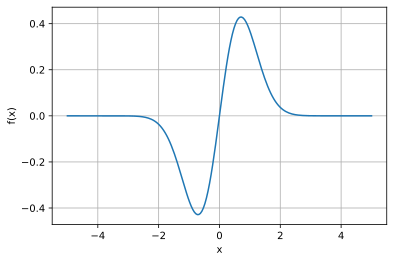

In [40]:
def f(x):
    return x*np.exp(-x**2)

def df(x):
    return np.exp(-x**2)*(1.0 - 2.0 * x**2)

x = np.linspace(-5,5,200)
plt.plot(x,f(x))
plt.xlabel('x'); plt.ylabel('f(x)')
plt.grid(True)

Now implement Newton method as a function.

In [41]:
def newton(f,df,x0,M=100,eps=1.0e-13,delta=1.0e-13):
    x = x0
    for i in range(M):
        dx = - f(x)/df(x)
        x  = x + dx
        print('%3d %20.14f %20.14e'%(i,x,abs(f(x))))
        if abs(dx) < eps * abs(x) or abs(f(x)) < delta:
            print('Convergence, current root = %e' % x)
            return x
    print('No convergence, current root = %e' % x)

We call Newton method with initial guess of 1.0.

In [42]:
x0 = 1.0
x = newton(f,df,x0,M=25)

  0     2.00000000000000 3.66312777774684e-02
  1     2.28571428571429 1.23042416958127e-02
  2     2.52761493366245 4.24692066217440e-03
  3     2.74222563057287 1.48694508186483e-03
  4     2.93754637191667 5.25266911540821e-04
  5     3.11822553305728 1.86689009860049e-04
  6     3.28726563963840 6.66497488920731e-05
  7     3.44674695324024 2.38760740659670e-05
  8     3.59818488819955 8.57632576175249e-06
  9     3.74272589511119 3.08739479516692e-06
 10     3.88126330595817 1.11345345114074e-06
 11     4.01450996603624 4.02176424271178e-07
 12     4.14304593383955 1.45455104254528e-07
 13     4.26735101318393 5.26662287965767e-08
 14     4.38782764844885 1.90881672652802e-08
 15     4.50481747099794 6.92427091290694e-09
 16     4.61861353233922 2.51373434583079e-09
 17     4.72946952843098 9.13197467419419e-10
 18     4.83760687625525 3.31955518039390e-10
 19     4.94322022608108 1.20736670698038e-10
 20     5.04648181382232 4.39359876571896e-11
 21     5.14754493954166 1.5995734

The iterations are diverging to $+\infty$. Now try with initial guess of 0.5

In [43]:
x0 = 0.5
x = newton(f,df,x0,M=25)

  0    -0.50000000000000 3.89400391535702e-01
  1     0.50000000000000 3.89400391535702e-01
  2    -0.50000000000000 3.89400391535702e-01
  3     0.50000000000000 3.89400391535702e-01
  4    -0.50000000000000 3.89400391535702e-01
  5     0.50000000000000 3.89400391535702e-01
  6    -0.50000000000000 3.89400391535702e-01
  7     0.50000000000000 3.89400391535702e-01
  8    -0.50000000000000 3.89400391535702e-01
  9     0.50000000000000 3.89400391535702e-01
 10    -0.50000000000000 3.89400391535702e-01
 11     0.50000000000000 3.89400391535702e-01
 12    -0.50000000000000 3.89400391535702e-01
 13     0.50000000000000 3.89400391535702e-01
 14    -0.50000000000000 3.89400391535702e-01
 15     0.50000000000000 3.89400391535702e-01
 16    -0.50000000000000 3.89400391535702e-01
 17     0.50000000000000 3.89400391535702e-01
 18    -0.50000000000000 3.89400391535702e-01
 19     0.50000000000000 3.89400391535702e-01
 20    -0.50000000000000 3.89400391535702e-01
 21     0.50000000000000 3.8940039

The iterates are oscillating. Next try with initial guess of 0.4

In [44]:
x0 = 0.4
x = newton(f,df,x0,M=25)

  0    -0.18823529411765 1.81682420172264e-01
  1     0.01435669158174 1.43537327630358e-02
  2    -0.00000592068797 5.92068796954781e-06
  3     0.00000000000000 4.15094425032601e-16
Convergence, current root = 4.150944e-16


Now we have convergence. Convergence depends strongly on the starting guess.

Let us now try a homotopy method. We find root of this function
$$
h(x) = t f(x) + (1-t)(f(x) - f(x_0)), \qquad h'(x) = f'(x)
$$
where $x_0$ is our initial guess. We start with $t=0.1$ and increase $t$ towards $t=1$.

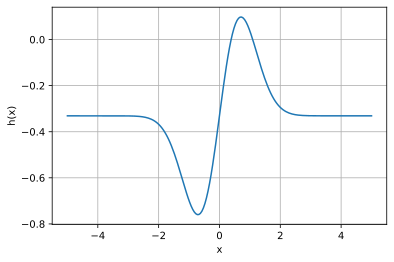

In [45]:
def hom(x,x0,t):
    return t*f(x)+(1-t)*(f(x)-f(x0))

def dh(x):
    return df(x)

x0, t = 1.0, 0.1
x = np.linspace(-5,5,200)
h = lambda x: hom(x,x0,t)
plt.plot(x,h(x))
plt.xlabel('x'); plt.ylabel('h(x)')
plt.grid(True)

Now try the continuation method.

In [46]:
tval = np.linspace(0.1,1,10)
r = 1.0
for t in tval:
    h = lambda x: hom(x,r,t)
    r = newton(h,dh,r,M=25)
    print(t,r)

  0     1.10000000000000 3.07448968142201e-03
  1     1.09273925777390 1.02456536414039e-05
  2     1.09271489747154 1.20217863441852e-10
  3     1.09271489718570 3.46944695195361e-17
Convergence, current root = 1.092715e+00
0.1 1.0927148971857048
  0     1.25016074774683 2.93056379269422e-03
  1     1.24358132682758 1.30694337532183e-06
  2     1.24358425855679 2.11684836326498e-13
  3     1.24358425855727 3.46944695195361e-17
Convergence, current root = 1.243584e+00
0.2 1.2435842585572674
  0     1.42183300818596 2.89942541228292e-03
  1     1.42902671155166 1.02460773616503e-05
  2     1.42905231453107 1.31787976365150e-10
  3     1.42905231486039 9.71445146547012e-17
Convergence, current root = 1.429052e+00
0.30000000000000004 1.429052314860389
  0     1.61437991188782 7.91523252254014e-03
  1     1.63983634106679 1.71212867133362e-04
  2     1.64041190479816 8.77777067281871e-08
  3     1.64041220018204 2.31342722756267e-14
Convergence, current root = 1.640412e+00
0.4 1.6404122001

TODO: not converging